# Serie A - Pressing


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from matplotlib import cm
import matplotlib.colors as mcolors
from highlight_text import fig_text
import pandas as pd
import numpy as np

from PIL import Image
import urllib
import os

In [2]:
font_path = "assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")


## Leggere il dataframe

In [14]:
df = pd.read_csv('data/fouls_cards.csv', index_col=0)
df

,team_id,Team,Gialli,Rossi,DoppioGiallo,Falli,FalliSubiti
0,9875,Napoli,47,1,0,389,468
1,8543,Lazio,85,2,0,400,471
2,9885,Juventus,74,6,1,456,409
3,8636,Inter,65,3,2,444,406
4,8524,Atalanta,83,3,1,470,385
5,8564,Milan,90,2,2,449,438
6,8686,Roma,82,4,2,446,505
7,8535,Fiorentina,93,3,2,488,511
8,9857,Bologna,84,3,2,477,426
9,6504,Monza,90,4,1,489,495


In [15]:
df = df.assign(falli_per_cartellino = lambda x: x.Falli / x.Gialli)

df = df.sort_values(by='falli_per_cartellino').reset_index(drop=True)

df

,team_id,Team,Gialli,Rossi,DoppioGiallo,Falli,FalliSubiti,falli_per_cartellino
0,7943,Sassuolo,90,6,3,408,443,4.533333
1,9882,Sampdoria,108,3,2,507,512,4.694444
2,8543,Lazio,85,2,0,400,471,4.705882
3,8564,Milan,90,2,2,449,438,4.988889
4,9881,Spezia,104,6,4,519,379,4.990385
5,8534,Empoli,88,7,3,441,459,5.011364
6,9876,Hellas Verona,103,3,0,540,383,5.242718
7,8535,Fiorentina,93,3,2,488,511,5.247312
8,6504,Monza,90,4,1,489,495,5.433333
9,8686,Roma,82,4,2,446,505,5.439024


## Visualizzazione

In [8]:
gradient = [
'#cb0000',
'#da2908',
'#d88300',
'#cbc000',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]

soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\vince\AppData\Local\Temp\ipykernel_3624\2545074497.py:15: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [9]:
def plot_bar(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "falli_per_cartellino", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['falli_per_cartellino'].min(),vmax=data['falli_per_cartellino'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['falli_per_cartellino'],
        color=cmap(norm(data['falli_per_cartellino'])),
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['falli_per_cartellino']):
    
        format_str = f"{value:.2f}"
        text_ = ax.annotate(
            xy = (index, value-0.2),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 11, 1)])

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,10),
        xytext=(6, 10),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,10),
        xytext=(13, 10),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,10),
        xytext=(6, 10),
        text='falli meno sanzionati',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,10),
        xytext=(13, 10),
        text='falli più sanzionati',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

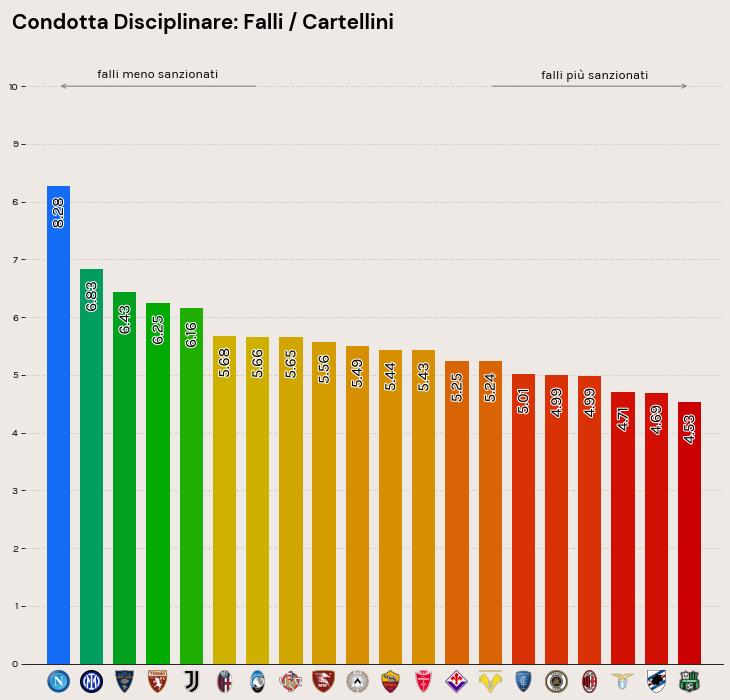

In [10]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_bar(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Falli / Cartellini",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

plt.savefig(
	"figures/SerieA_Fouls_Cards.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)


In [16]:
df = df.sort_values(by='Gialli', ascending=False).reset_index(drop=True)

df['TotCartellini'] = df['Gialli'] + df['Rossi']
df

,team_id,Team,Gialli,Rossi,DoppioGiallo,Falli,FalliSubiti,falli_per_cartellino,TotCartellini
0,9882,Sampdoria,108,3,2,507,512,4.694444,111
1,9881,Spezia,104,6,4,519,379,4.990385,110
2,9876,Hellas Verona,103,3,0,540,383,5.242718,106
3,8535,Fiorentina,93,3,2,488,511,5.247312,96
4,7943,Sassuolo,90,6,3,408,443,4.533333,96
5,6504,Monza,90,4,1,489,495,5.433333,94
6,8564,Milan,90,2,2,449,438,4.988889,92
7,8534,Empoli,88,7,3,441,459,5.011364,95
8,8600,Udinese,87,3,1,478,476,5.494253,90
9,9888,Lecce,86,2,1,553,439,6.430233,88


In [28]:
def plot_bar(ax, fig, df):
    data = df.copy()
    data = (
        data
        .sort_values(by = "TotCartellini", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    # We specify the width of the bar
    width_bar = 0.35

    # Fouls conceded
    ax.bar(
        data.index, 
        data['Gialli'],
        lw = .75, 
        color = "#FFB000", 
        zorder = 3, 
        width = width_bar,
        label = "Cartellini Gialli"
    )

    ax.bar(
        data.index + width_bar, 
        data['Rossi'],
        lw = .75, 
        color = "#785EF0", 
        zorder = 3, 
        width = width_bar,
        label = "Cartellini Rossi"
    )
    
    ax.legend(
        ncol = 2, 
        loc = "upper center", 
        bbox_to_anchor = (0.5, 1),
        frameon = False,
        fontsize = 15
    )
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 130, 10)])

    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index + width_bar/2,
        labels = []
    )

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index-width_bar/2, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,120),
        xytext=(6, 120),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,120),
        xytext=(13, 120),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,100),
        xytext=(6,100),
        text='+ fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,100),
        xytext=(13,100),
        text='- fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

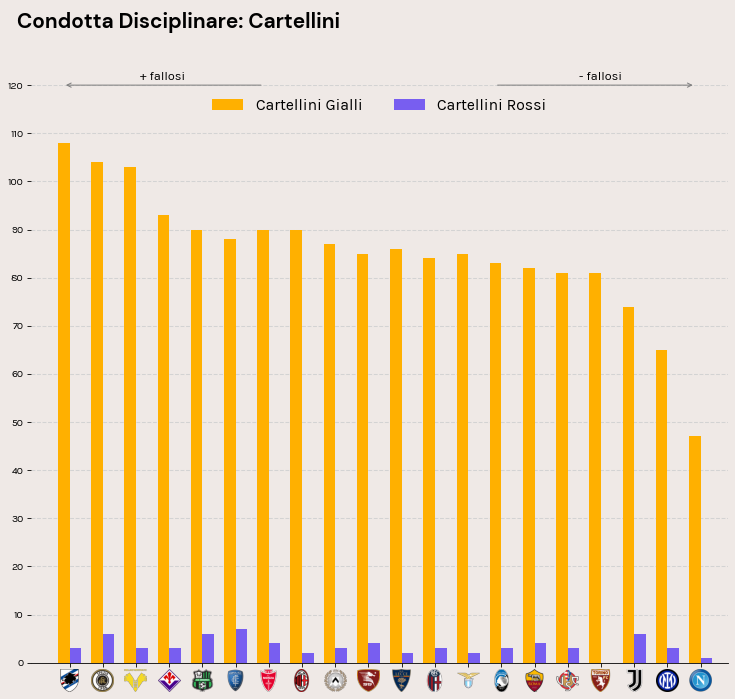

In [29]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_bar(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Cartellini",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

plt.show()


In [30]:
df["ratio"] = df["Falli"]/df["FalliSubiti"]
df = df.sort_values(by = "ratio", ascending = False)

ratio = df["ratio"].reset_index(drop = True)
df

,team_id,Team,Gialli,Rossi,DoppioGiallo,Falli,FalliSubiti,falli_per_cartellino,TotCartellini,ratio
2,9876,Hellas Verona,103,3,0,540,383,5.242718,106,1.409922
1,9881,Spezia,104,6,4,519,379,4.990385,110,1.369393
16,9804,Torino,81,0,0,506,382,6.246914,81,1.324607
9,9888,Lecce,86,2,1,553,439,6.430233,88,1.259681
13,8524,Atalanta,83,3,1,470,385,5.662651,86,1.220779
15,7801,Cremonese,81,3,0,458,407,5.654321,84,1.125307
12,9857,Bologna,84,3,2,477,426,5.678571,87,1.119718
17,9885,Juventus,74,6,1,456,409,6.162162,80,1.114914
18,8636,Inter,65,3,2,444,406,6.830769,68,1.093596
11,6480,Salernitana,85,4,1,473,439,5.564706,89,1.077449


In [31]:
gradient = [
'#cb0000',
'#da2908',
'#d88300',
'#cbc000',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]

gradient.reverse()

soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\vince\AppData\Local\Temp\ipykernel_3624\100430354.py:17: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [37]:
def plot_bar(ax, fig, df):

    data = df.copy()
    data = (
        data
        .sort_values(by = "ratio", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7


    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['ratio'].min(),vmax=data['ratio'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['ratio'],
        color=cmap(norm(data['ratio'])),
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['ratio']):
    
        format_str = f"{value:.2f}"
        text_ = ax.annotate(
            xy = (index, value-0.02),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks(np.arange(0, 1.8, 0.1))#[x for x in range(0.0, 2.0, 0.1)])

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,1.6),
        xytext=(6, 1.6),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,1.6),
        xytext=(13, 1.6),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,1.62),
        xytext=(6, 1.62),
        text='+ falli fatti',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,1.62),
        xytext=(13, 1.62),
        text='+ falli subiti',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

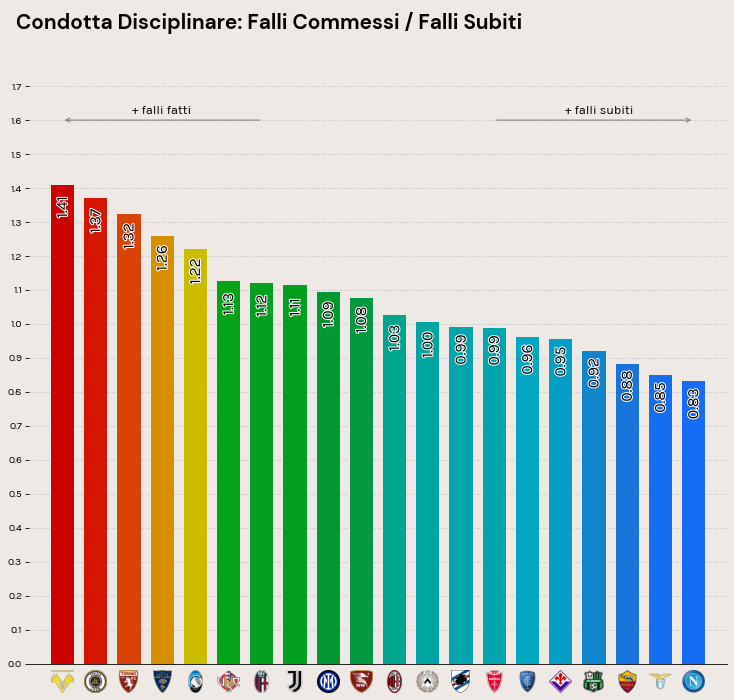

In [39]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_bar(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Falli Commessi / Falli Subiti",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

plt.savefig(
	"figures/SerieA_Ratio_Fouls.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)
